### Import the libraries

In [128]:
import numpy as np #numerical python library with mathematical operations for arrays and matrix structures
import pandas as pd #library for data manipulation and analysis
import matplotlib.pyplot as plt #library to visualise data
import seaborn as sns #other visualisation library with matplotlib under the hood

### Load the data and set index

In [129]:
dataframe = pd.read_csv('/Users/nicolasdemuynck/Documents/Tech Talks/3/stockmarket_closing_prices.csv', index_col = 'Date')
dataframe.head (5)

,Apple,AAG,Amazon,Facebook,Google,Intel,Microsoft,NDM
Date,,,,,,,,
2019-01-24,152.699997,65.779999,1654.930054,145.830002,1084.000000,49.759998,106.199997,0.71
2019-01-25,157.759995,63.480000,1670.569946,149.009995,1101.510010,47.040001,107.169998,0.71
2019-01-28,156.300003,64.529999,1637.890015,147.470001,1079.859985,46.709999,105.080002,0.75
2019-01-29,154.679993,64.559998,1593.880005,144.190002,1070.060059,46.540001,102.940002,0.75
2019-01-30,165.250000,64.660004,1670.430054,150.419998,1097.989990,47.540001,106.379997,0.77


In [130]:
dataframe.count ()

Apple        300
AAG          300
Amazon       300
Facebook     300
Google       300
Intel        300
Microsoft    300
NDM          300
dtype: int64

### Delete columns

In [131]:
del dataframe['AAG']
del dataframe['NDM']
dataframe.head (5) # show only tech companies

,Apple,Amazon,Facebook,Google,Intel,Microsoft
Date,,,,,,
2019-01-24,152.699997,1654.930054,145.830002,1084.000000,49.759998,106.199997
2019-01-25,157.759995,1670.569946,149.009995,1101.510010,47.040001,107.169998
2019-01-28,156.300003,1637.890015,147.470001,1079.859985,46.709999,105.080002
2019-01-29,154.679993,1593.880005,144.190002,1070.060059,46.540001,102.940002
2019-01-30,165.250000,1670.430054,150.419998,1097.989990,47.540001,106.379997


### Add columns

In [133]:
dataframe['21_day_AAPL'] = dataframe.Apple.rolling(21).mean () # one month average Apple stockprice
dataframe['63_day_AAPL'] = dataframe.Apple.rolling (63).mean () # 3 month average Apple stockprice
dataframe.dropna (inplace = True) #get rid of the NAN
dataframe.head (5)

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
Date,,,,,,,,
2019-07-23,208.839996,1994.489990,202.360001,1148.050049,51.750000,139.289993,202.449525,196.019842
2019-07-24,208.669998,2000.810059,204.660004,1139.729980,52.919998,140.720001,202.930001,196.043810
2019-07-25,207.020004,1973.819946,200.710007,1135.939941,52.160000,140.190002,203.475239,196.071429
2019-07-26,207.740005,1943.050049,199.750000,1245.219971,51.590000,141.339996,203.853335,196.126032
2019-07-29,209.679993,1912.449951,195.940002,1241.839966,52.509998,141.029999,204.326667,196.206508


### Data visualization: timeseries

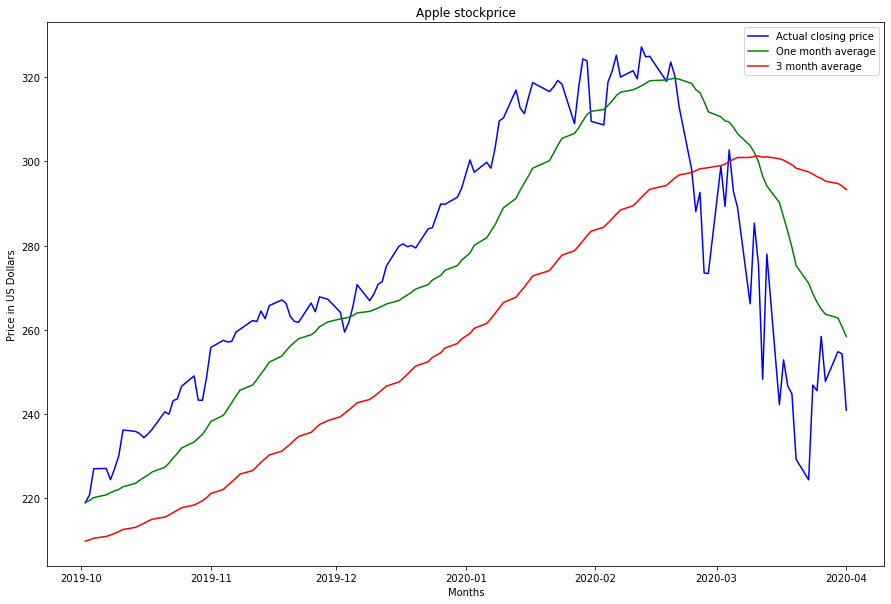

In [135]:
plt.figure(figsize = (15,10))

plt.plot (dataframe.Apple[-126:], label = 'Actual closing price', c= 'b') #last six months
plt.plot (dataframe['21_day_AAPL'][-126:], label = 'One month average', c = 'g') 
plt.plot (dataframe['63_day_AAPL'][-126:], label = '3 month average', c= 'r')

dataframe.index = pd.to_datetime(dataframe.index)
plt.xlabel ('Months')
plt.ylabel ('Price in US Dollars')
plt.title ('Apple stockprice')

plt.legend ()
plt.show ()

### Transform the dataset

In [136]:
pct_change = np.log (dataframe).diff () #logarithm is mathematical function which you can call with pandas
pct_change.dropna (inplace = True) #deletes the Nan
pct_change #checks the price difference in % 

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
Date,,,,,,,,
2019-07-24,-0.000814,0.003164,0.011302,-0.007274,0.022357,0.010214,0.002371,0.000122
2019-07-25,-0.007939,-0.013581,-0.019489,-0.003331,-0.014465,-0.003773,0.002683,0.000141
2019-07-26,0.003472,-0.015712,-0.004795,0.091852,-0.010988,0.008170,0.001856,0.000278
2019-07-29,0.009295,-0.015874,-0.019258,-0.002718,0.017676,-0.002196,0.002319,0.000410
2019-07-30,-0.004301,-0.007305,0.005598,-0.011207,-0.015546,-0.004833,0.002528,0.000656
...,...,...,...,...,...,...,...,...
2020-03-26,0.051285,0.036267,0.044633,0.054152,0.080193,0.060673,-0.006130,-0.001384
2020-03-27,-0.042284,-0.028734,-0.040927,-0.046340,-0.058770,-0.041928,-0.004644,-0.002264
2020-03-30,0.028138,0.033051,0.056779,0.031954,0.057869,0.067977,-0.003355,-0.001883


### Show the descriptive statistics

In [137]:
dataframe.describe ()

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,257.277499,1842.313632,192.401648,1286.862667,55.186136,150.520909,254.657908,242.632904
std,39.173372,105.662132,16.592467,112.774951,6.008010,14.286038,39.725151,37.739662
min,193.339996,1676.609985,146.009995,1054.130005,44.610001,132.210007,202.449525,195.846508
25%,220.790005,1768.734985,183.662498,1205.592468,50.914999,138.424995,214.588571,207.808770
50%,257.369995,1807.709961,191.224998,1268.275024,55.900002,147.190002,258.146430,235.153889
75%,289.440002,1888.419983,202.395000,1354.702515,58.932500,158.977505,289.312377,281.424841
max,327.200012,2170.219971,223.229996,1524.869995,68.470001,188.699997,319.757144,301.311427


In [138]:
pct_change.describe ()

,Apple,Amazon,Facebook,Google,Intel,Microsoft,21_day_AAPL,63_day_AAPL
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.000816,-0.000254,-0.001356,-0.000233,0.000014,0.000503,0.001395,0.002303
std,0.027908,0.019589,0.025894,0.023926,0.034013,0.027863,0.004677,0.001856
min,-0.137708,-0.082535,-0.153769,-0.123685,-0.198957,-0.159453,-0.015630,-0.002965
25%,-0.007419,-0.009621,-0.012793,-0.007008,-0.010110,-0.008634,0.000134,0.001538
50%,0.001644,-0.001005,0.001334,0.000467,-0.000892,0.001027,0.002645,0.002379
75%,0.013366,0.008399,0.011265,0.009840,0.012639,0.011668,0.004316,0.003811
max,0.113157,0.071196,0.097444,0.091852,0.178324,0.132929,0.007582,0.004998


### Visualize the data: Histograms

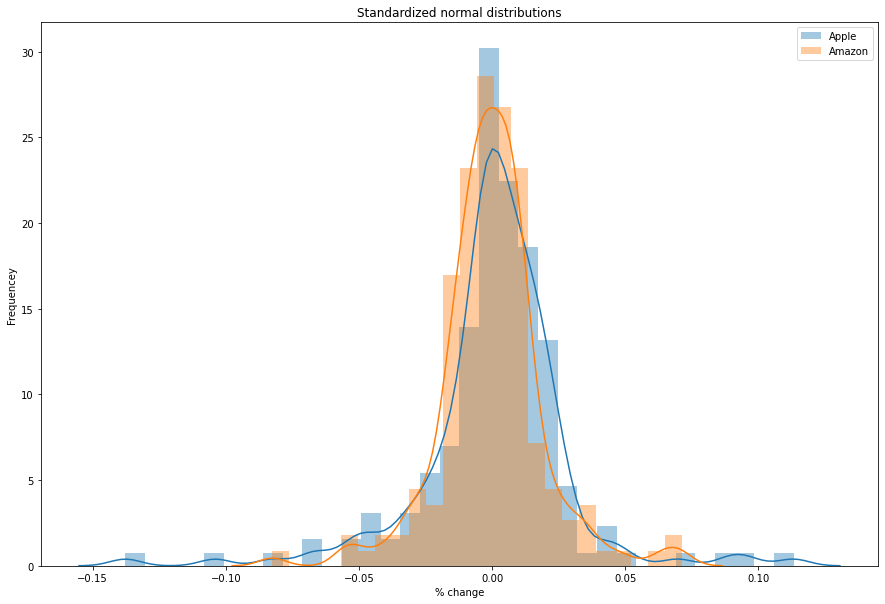

In [139]:
plt.figure(figsize = (15,10))

sns.distplot (pct_change.Apple, label = 'Apple')
sns.distplot (pct_change.Amazon, label = 'Amazon')

plt.title('Standardized normal distributions')
plt.xlabel ('% change')
plt.ylabel ('Frequencey')

plt.legend ()

plt.show ()

#show first plt.hist
#sns.distplot looks nicer then plt.hist
#sns.distplot allows you to put 2 histograms on eachother.
#with the normal dataframe it is difficult to compare the normal distributions as their prices vary.
#by standardizing the normal distributions by making sure both means are zero. you can easily compare them.